In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [2]:
# identify and change directory
new_dir = 'Z:/Desktop/AS_Matlab/';
os.chdir(new_dir)

In [3]:
# read datatframe
df_waterT_30m = pd.read_csv('waterT_SMEAR_Kuivajarvi_120101_230630_30min.csv',sep=',')

df_waterT_30m['dates'] = pd.to_datetime(df_waterT_30m[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])
df_waterT_30m.set_index('dates', inplace=True)
df_waterT_1d = df_waterT_30m.resample('1d').mean()
df_waterT_1d.drop(['Year', 'Month','Day','Hour','Minute','Second'], axis=1, inplace=True)

df_waterT_1d['FormattedDate'] = df_waterT_1d.index
df_waterT_1d['FormattedDate'] = df_waterT_1d['FormattedDate'].dt.strftime('%Y-%m-%d %H:%M')

df_waterT_1d.columns = ['temp10.0','temp1.5','temp0.5','temp12.0','temp2.0','temp1.0','temp4.0','temp3.0','temp0.2','temp3.5','temp2.5','temp4.5','temp6.0','temp5.0','temp8.0','temp7.0','dates_waterT']
new_column_order = ['dates_waterT','temp0.2', 'temp0.5', 'temp1.0', 'temp1.5','temp2.0', 'temp2.5','temp3.0','temp3.5','temp4.0','temp4.5','temp5.0','temp6.0','temp7.0','temp8.0','temp10.0','temp12.0']
df_waterT_1d = df_waterT_1d[new_column_order]

df_waterT_30m.drop(['Year', 'Month','Day','Hour','Minute','Second'], axis=1, inplace=True)
print(df_waterT_30m)

                     KVJ_META.Tw100  KVJ_META.Tw15  KVJ_META.Tw05  \
dates                                                               
2012-01-01 00:00:00             NaN            NaN            NaN   
2012-01-01 00:30:00             NaN            NaN            NaN   
2012-01-01 01:00:00             NaN            NaN            NaN   
2012-01-01 01:30:00             NaN            NaN            NaN   
2012-01-01 02:00:00             NaN            NaN            NaN   
...                             ...            ...            ...   
2023-06-30 21:30:00             NaN            NaN            NaN   
2023-06-30 22:00:00             NaN            NaN            NaN   
2023-06-30 22:30:00             NaN            NaN            NaN   
2023-06-30 23:00:00             NaN            NaN            NaN   
2023-06-30 23:30:00             NaN            NaN            NaN   

                     KVJ_META.Tw120  KVJ_META.Tw20  KVJ_META.Tw10  \
dates                            

In [4]:
# read turnover dates
turnover_periods = pd.read_csv('Turnover_dates.csv',sep=';',names=["Year","Month","Day","Hour","Minute"],na_values=['','','NaN'])
turnover_periods['datetime'] = pd.to_datetime(turnover_periods[['Year','Month','Day','Hour','Minute']])
turnover_periods = turnover_periods[['datetime']]
# print(FCO2_filled.columns)

C:\Hyapp\Anaconda3-2023.07-2\Lib\site-packages\pandas\core\arrays\timedeltas.py:908: RuntimeWarning: invalid value encountered in cast
  base = data.astype(np.int64)
C:\Hyapp\Anaconda3-2023.07-2\Lib\site-packages\pandas\core\arrays\timedeltas.py:912: RuntimeWarning: invalid value encountered in cast
  data = (base * m + (frac * m).astype(np.int64)).view("timedelta64[ns]")


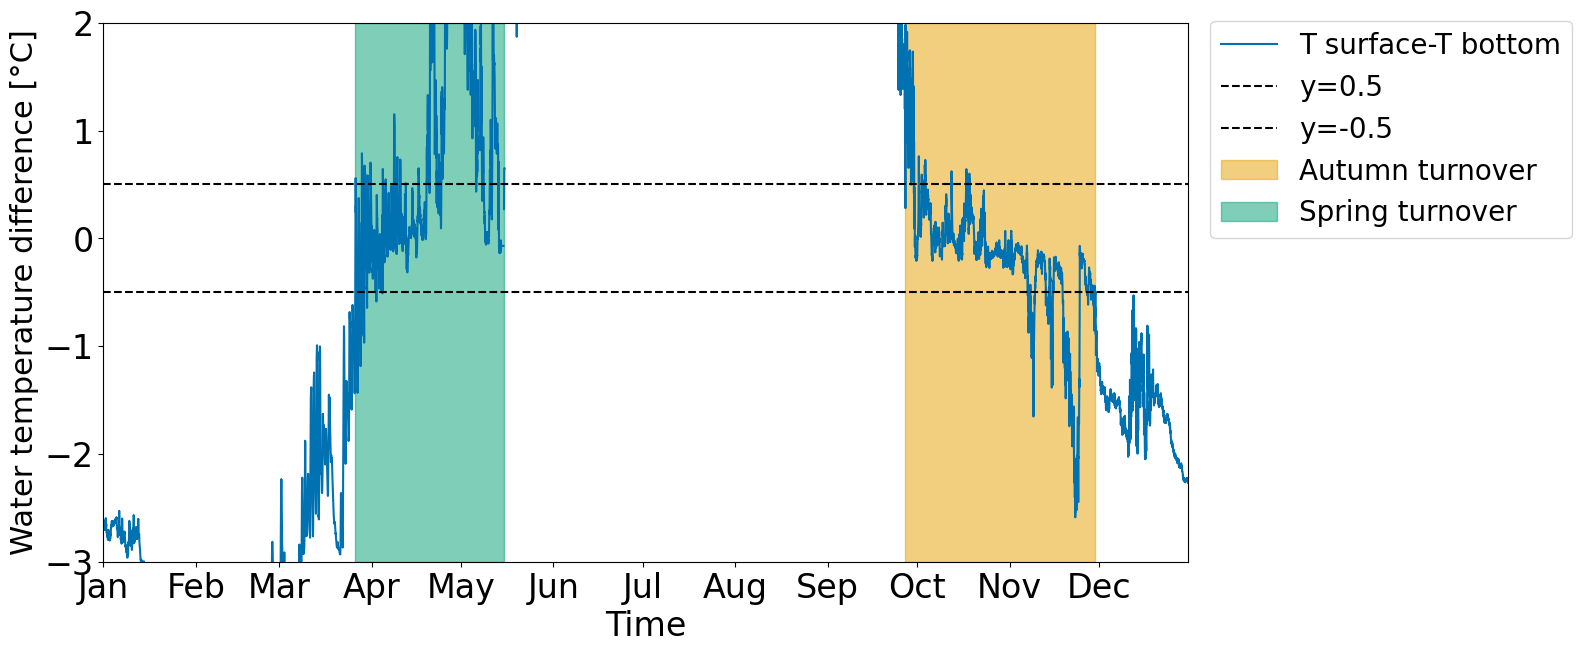

In [5]:
import matplotlib.dates as mdates
from datetime import datetime

fig, ax = plt.subplots(figsize=(14, 7))

# Plot the temperature difference
ax.plot(df_waterT_30m.index, df_waterT_30m['KVJ_META.Tw02'] - df_waterT_30m['KVJ_META.Tw120'], color='#0072b2')

# Add horizontal lines
ax.axhline(y=0.5, color='k', linestyle='--')
ax.axhline(y=-0.5, color='k', linestyle='--')

# Define colors for shading periods
colors = ["#e69f00", "#009e73"]

# Highlight turnover periods with shading
for i in range(0, len(turnover_periods), 2):
    start_period = turnover_periods['datetime'].iloc[i]
    end_period = turnover_periods['datetime'].iloc[i+1]
    if pd.notna(start_period):
        ax.axvspan(start_period, end_period, color=colors[int(np.floor(i % 4) / 2)], alpha=0.5)

# Set x-axis limits for the year 2014
ax.set_xlim([datetime(2014, 1, 1), datetime(2014, 12, 31)])
ax.set_ylim([-3,2])

# Set month formatter for x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # 'Jan', 'Feb', etc.
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Tick at the start of each month

# ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # 'Jan', 'Feb', etc.
# ax.xaxis.set_major_locator(mdates.YearLocator())  # Tick at the start of each month

# Set labels and title
ax.set_xlabel('Time', fontsize=24)
ax.set_ylabel('Water temperature difference [°C]', fontsize=22)
# ax.set_title('Turnover periods for lake Kuivajärvi (2014)', fontsize=20)

# Customize tick parameters
plt.tick_params(rotation=0, labelsize=24)

# Add legend
ax.legend(['T surface-T bottom', 'y=0.5', 'y=-0.5', 'Autumn turnover', 'Spring turnover'], fontsize=20, loc='lower left', bbox_to_anchor=(1.02, 0.6), borderaxespad=0.)

# Save the figure
plt.savefig('Turnover_def_2014_+-5.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

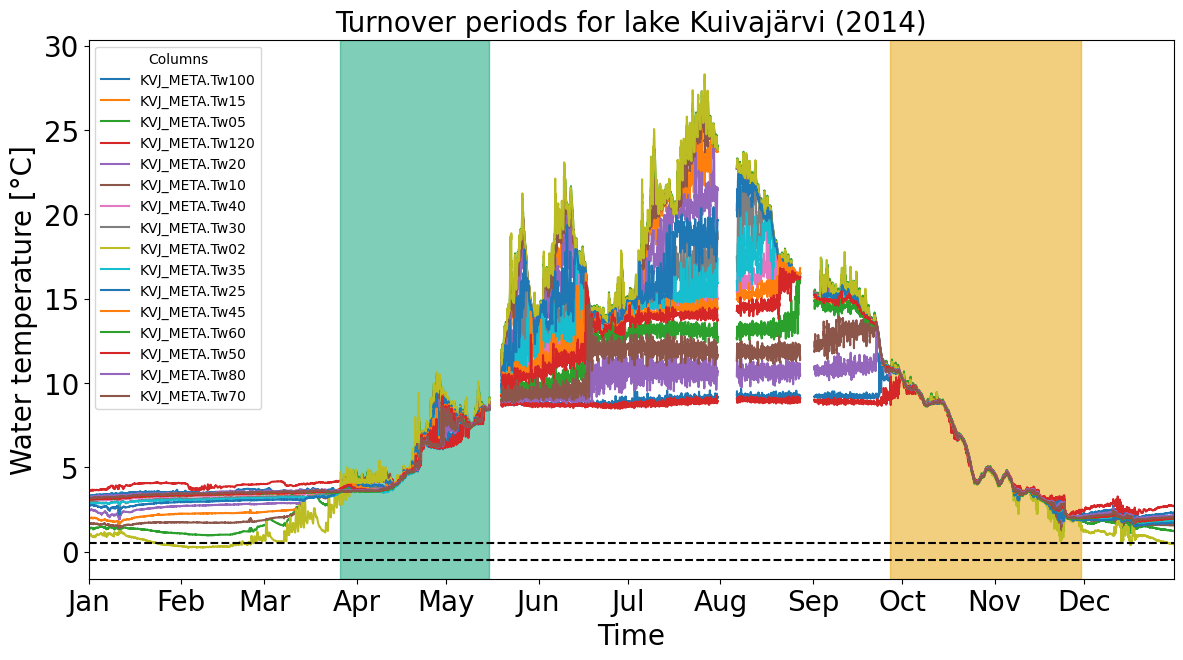

In [6]:
fig, ax = plt.subplots(figsize=(14, 7))

# Plot T at all depths
for column in df_waterT_30m:
    plt.plot(df_waterT_30m.index, df_waterT_30m[column], label=column)

# Add legend, labels, and title
plt.legend(title='Columns')

# Add horizontal lines
ax.axhline(y=0.5, color='k', linestyle='--')
ax.axhline(y=-0.5, color='k', linestyle='--')

# Define colors for shading periods
colors = ["#e69f00", "#009e73"]

# Highlight turnover periods with shading
for i in range(0, len(turnover_periods), 2):
    start_period = turnover_periods['datetime'].iloc[i]
    end_period = turnover_periods['datetime'].iloc[i+1]
    if pd.notna(start_period):
        ax.axvspan(start_period, end_period, color=colors[int(np.floor(i % 4) / 2)], alpha=0.5)

# Set x-axis limits for the year 2014
ax.set_xlim([datetime(2014, 1, 1), datetime(2014, 12, 31)])
# ax.set_ylim([4.5,5])

# Set month formatter for x-axis
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # 'Jan', 'Feb', etc.
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Tick at the start of each month

# Set labels and title
ax.set_xlabel('Time', fontsize=20)
ax.set_ylabel('Water temperature [°C]', fontsize=20)
ax.set_title('Turnover periods for lake Kuivajärvi (2014)', fontsize=20)

# Customize tick parameters
plt.tick_params(rotation=0, labelsize=20)

# Add legend
# ax.legend(['T surface-T bottom', 'y=0.5', 'y=-0.5', 'Autumn turnover', 'Spring turnover'], fontsize=20, loc='lower left')

# Save the figure
plt.savefig('Turnover_def_2014_alldepths.png', format='png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

In [7]:
df_waterT_1d.to_csv('Kuivajarvi.tsv', sep='\t', na_rep='NaN',index=False)

In [8]:
# read datatframe
df_wind_1d = pd.read_csv('daily_avg_U.csv',sep=';')
print(df_wind_1d)

     date,KVJ_EDDY.U
0        2012-01-01,
1        2012-01-02,
2        2012-01-03,
3        2012-01-04,
4        2012-01-05,
...              ...
3283     2020-12-27,
3284     2020-12-28,
3285     2020-12-29,
3286     2020-12-30,
3287     2020-12-31,

[3288 rows x 1 columns]


In [9]:
df_wind_1d['DateTime'] = pd.to_datetime(df_wind_1d[['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second']])
print(df_wind_1d)
df_wind_1d.drop(['Year', 'Month','Day', 'Hour', 'Minute', 'Second'], axis=1, inplace=True)

df_wind_1d['DateTime'] = df_wind_1d['DateTime'].dt.strftime('%Y-%m-%d %H:%M')

KeyError: "None of [Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Second'], dtype='object')] are in the [columns]"

In [ ]:
print(df_wind_1d)

In [ ]:
new_order = ['DateTime','KVJ_EDDY.U']
df_wind_1d = df_wind_1d[new_order]
df_wind_1d = df_wind_1d.rename(columns={'KVJ_EDDY.U': 'windSpeed'}) 
df_wind_1d.to_csv('wind_KVJ_EDDYU.csv',sep='\t',na_rep='NaN',index=False)

In [ ]:
print(df_wind_1d)

In [ ]:
df_wind_1d.to_csv('Kuivajarvi_wind_LAM.tsv', sep='\t', na_rep='NaN',index=False)